### Load Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Prepare/collect data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install install patool
import patoolib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.7/93.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
patoolib.extract_archive('/content/gdrive/MyDrive/Brain_Tumor_Dataset_PR.zip', outdir="/content/Brain_tumor_dataset")

INFO patool: Extracting /content/gdrive/MyDrive/Brain_Tumor_Dataset_PR.zip ...
INFO:patool:Extracting /content/gdrive/MyDrive/Brain_Tumor_Dataset_PR.zip ...
INFO patool: ... creating output directory `/content/Brain_tumor_dataset'.
INFO:patool:... creating output directory `/content/Brain_tumor_dataset'.
INFO patool: running /usr/bin/7z x -o/content/Brain_tumor_dataset -- /content/gdrive/MyDrive/Brain_Tumor_Dataset_PR.zip
INFO:patool:running /usr/bin/7z x -o/content/Brain_tumor_dataset -- /content/gdrive/MyDrive/Brain_Tumor_Dataset_PR.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/gdrive/MyDrive/Brain_Tumor_Dataset_PR.zip extracted to `/content/Brain_tumor_dataset'.
INFO:patool:... /content/gdrive/MyDrive/Brain_Tumor_Dataset_PR.zip extracted to `/content/Brain_tumor_dataset'.


'/content/Brain_tumor_dataset'

In [ ]:
import os

path = os.listdir('/content/Brain_tumor_dataset/Training/')
classes = {'glioma':0, 'meningioma':1, 'notumor':2,'pituitary':3}

In [ ]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '/content/Brain_tumor_dataset/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [ ]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [ ]:
np.unique(Y)

array([0, 1, 2, 3])

In [ ]:
pd.Series(Y).value_counts()

2    1595
3    1457
1    1339
0    1321
dtype: int64

In [ ]:
X.shape, X_updated.shape

((5712, 200, 200), (5712, 40000))

### Visualize data

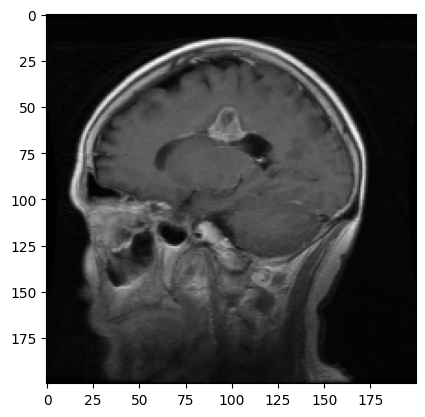

In [ ]:
plt.imshow(X[0], cmap='gray')

### Prepare data

In [ ]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(5712, 40000)

### Split Data

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [ ]:
xtrain.shape, xtest.shape

((4569, 40000), (1143, 40000))

### Feature Scaling

In [ ]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


### Train Model

In [ ]:
import warnings
warnings.filterwarnings('ignore')





from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [ ]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

### Evaluation

In [ ]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 0.9943094769096082
Testing Score: 0.8285214348206474


In [ ]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.940030641278179
Testing Score: 0.8740157480314961


### Prediction

In [ ]:
pred = sv.predict(xtest)

In [ ]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  10,   14,   20,   24,   36,   44,   50,   54,   55,   58,   59,
          62,   73,   77,   88,   98,  109,  126,  184,  193,  195,  205,
         207,  218,  234,  241,  245,  248,  260,  268,  269,  280,  291,
         303,  308,  311,  314,  323,  328,  337,  345,  351,  364,  366,
         367,  368,  371,  377,  396,  412,  415,  417,  418,  426,  444,
         451,  465,  466,  467,  472,  479,  515,  517,  523,  530,  531,
         539,  547,  559,  571,  583,  591,  597,  598,  603,  613,  616,
         618,  624,  635,  638,  643,  654,  676,  683,  694,  696,  701,
         714,  722,  737,  757,  769,  778,  787,  803,  809,  812,  815,
         816,  828,  829,  834,  854,  860,  861,  864,  870,  886,  891,
         900,  902,  909,  915,  917,  919,  925,  933,  934,  937,  943,
         948,  974,  979,  984,  996, 1002, 1010, 1031, 1039, 1044, 1045,
        1050, 1074, 1081, 1094, 1102, 1103, 1120, 1121, 1127, 1136, 1138,
        1140]),)

In [ ]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  144
0 1


### TEST MODEL

In [ ]:
dec = {0:'Glioma', 1:'Meningioma',2:'No Tumor',3: 'Pitutary'}

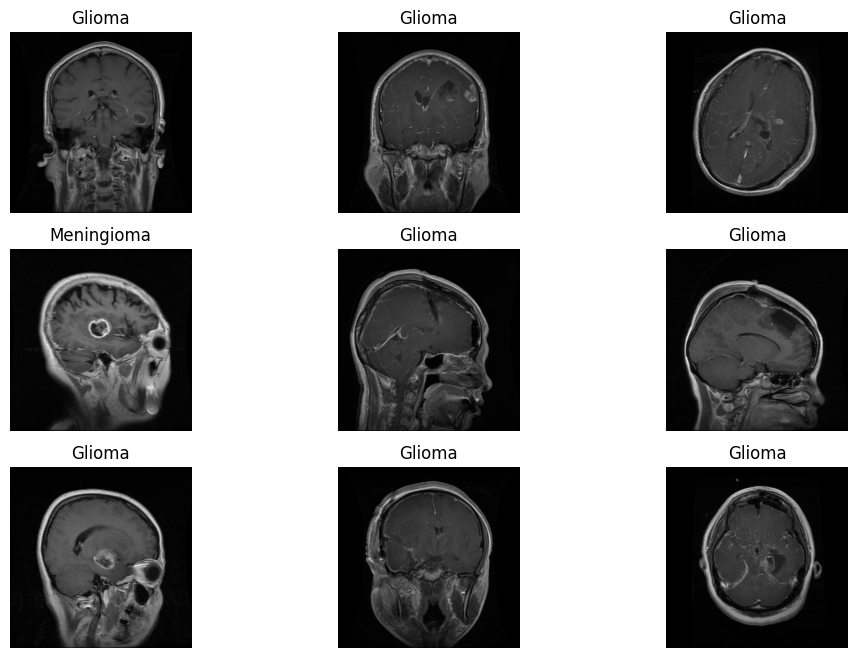

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/Brain_tumor_dataset/Testing/')
c=1
for i in os.listdir('/content/Brain_tumor_dataset/Testing/glioma/')[:9]:
    plt.subplot(3,3,c)

    img = cv2.imread('/content/Brain_tumor_dataset/Testing/glioma/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

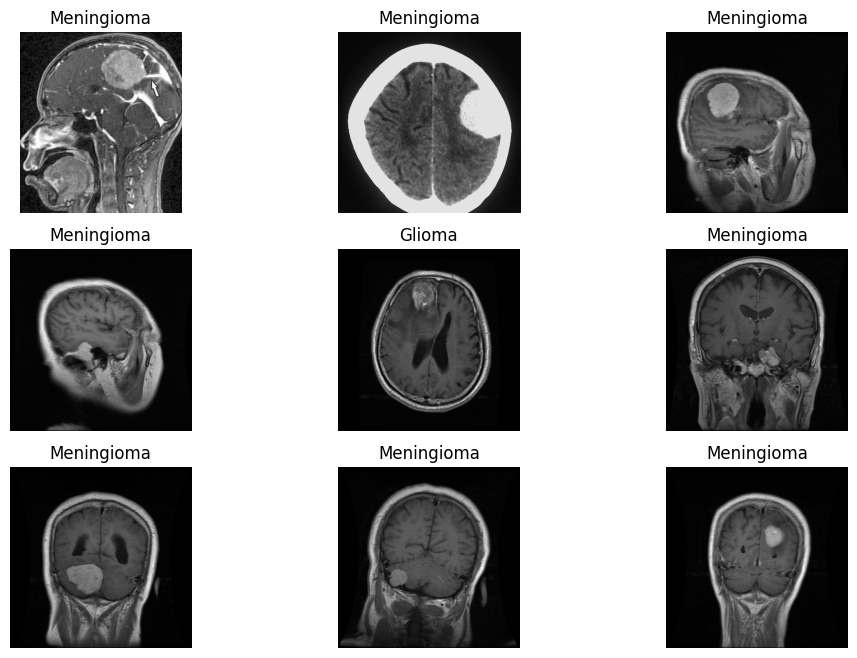

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/Brain_tumor_dataset/Testing/')
c=1
for i in os.listdir('/content/Brain_tumor_dataset/Testing/meningioma/')[:9]:
    plt.subplot(3,3,c)

    img = cv2.imread('/content/Brain_tumor_dataset/Testing/meningioma/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

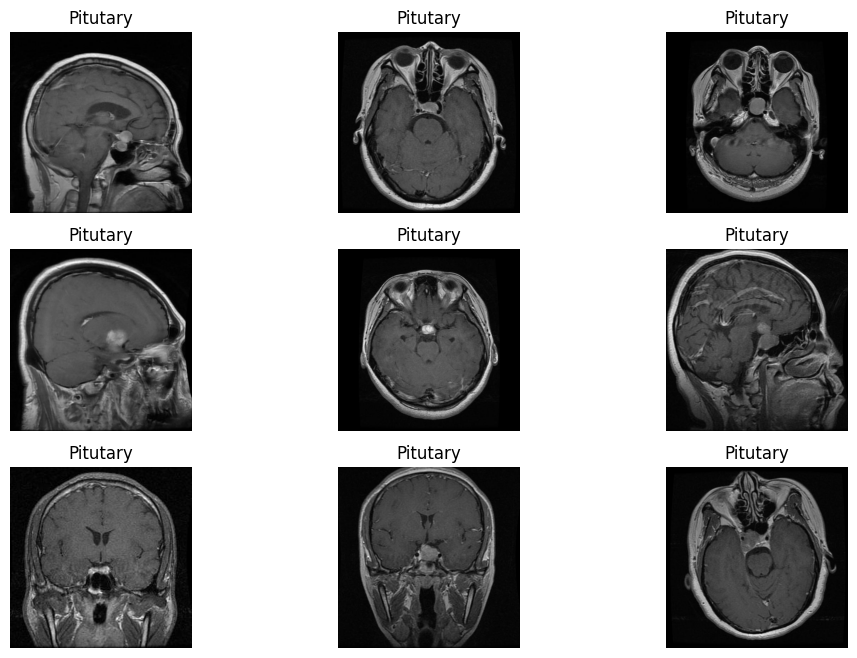

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/Brain_tumor_dataset/Testing/')
c=1
for i in os.listdir('/content/Brain_tumor_dataset/Testing/pituitary/')[:9]:
    plt.subplot(3,3,c)

    img = cv2.imread('/content/Brain_tumor_dataset/Testing/pituitary/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

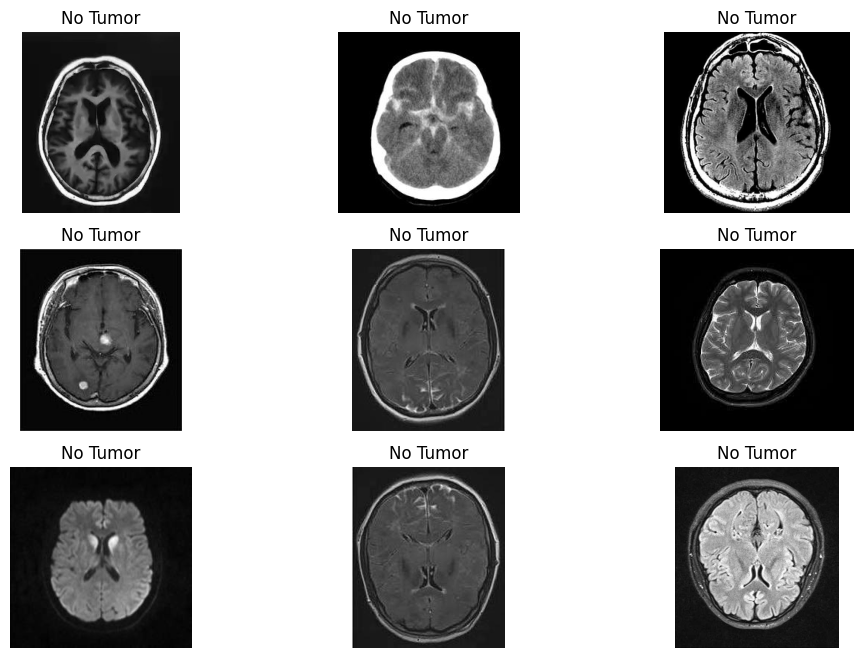

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/Brain_tumor_dataset/Testing/')
c=1
for i in os.listdir('/content/Brain_tumor_dataset/Testing/notumor/')[:9]:
    plt.subplot(3,3,c)

    img = cv2.imread('/content/Brain_tumor_dataset/Testing/notumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1